In [20]:
from helper_lstm import *
import pandas as pd
from os import listdir
from os.path import isfile, join
import pickle

In [21]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate,num_of_layers,num_hidden_nodes,activation, batch_size,dropout,timesteps=1):
      
    train,val,test,sc=get_train_test(series)
    #named blackbox becuase it represents the structure
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    print('Creating Model')
    model = create_model(X_train,learning_rate=learning_rate,
                         num_of_layers=num_of_layers,
                         num_hidden_nodes=num_hidden_nodes,
                         activation=activation,
                         dropout=dropout
                        )
     
    blackbox = model.fit(X_train,Y_train,epochs = 5000,batch_size = batch_size,validation_data = (X_val, Y_val),verbose = 0,callbacks=callbacks_list)
    
    accuracy = blackbox.history['val_loss'][-1]
    #accuracy = blackbox.history['mean_squared_error'][-1]
    # Print the classification accuracy.
    print(accuracy)
    #print("Accuracy: {0:.2%}".format(accuracy))
    print()


    # Delete the Keras model with these hyper-parameters from memory.
    del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    K.clear_session()
    #tensorflow.reset_default_graph()
    
    return accuracy

In [22]:
country='India'
with open('model/'+country+'_lstm.pckl', 'rb') as f:
    data = pickle.load(f)
series=get_data(country)
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
#earlystop = EarlyStopping(monitor='mean_squared_error', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

C:\Users\ase072\AppData\Local\Continuum\anaconda3\envs\ratnabali3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ase072\Documents\Research\ratnabali\code_github\helper_lstm.py:53: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  dateparse = lambda dates: [pd.datetime.strptime(d, '%d-%m-%Y') for d in dates]


In [23]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('COVID-19 Prediction Graph using Multivariate-LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [24]:
def get_original_train_test(series):
    # Train Val Test Split
    train_start = dt.date(2020,1,22)
    train_end = dt.date(2020,6,15)
    train_data = series.loc[train_start:train_end]

    val_start = dt.date(2020,6,16)
    val_end = dt.date(2020,7,10)
    val_data = series.loc[val_start:val_end]

    test_start = dt.date(2020,7,11)
    test_end = dt.date(2020,8,3)
    test_data = series.loc[test_start:test_end]

#print(train_data.shape,val_data.shape,test_data.shape)
    # Normalisation
    sc = MinMaxScaler()
    train = sc.fit_transform(train_data)
    val = sc.transform(val_data)
    test = sc.transform(test_data)
    return train_data,val_data,test_data,sc

0.0012745876086871953 4 10 relu 10
Train on 141 samples, validate on 20 samples
Epoch 1/5000
141/141 [==============================] - 3s 23ms/step - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 2.1727 - val_mean_squared_error: 2.1727
Epoch 2/5000
141/141 [==============================] - 0s 870us/step - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 2.1289 - val_mean_squared_error: 2.1289
Epoch 3/5000
141/141 [==============================] - 0s 896us/step - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 2.0834 - val_mean_squared_error: 2.0834
Epoch 4/5000
141/141 [==============================] - 0s 962us/step - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 2.0329 - val_mean_squared_error: 2.0329
Epoch 5/5000
141/141 [==============================] - 0s 1ms/step - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 1.9753 - val_mean_squared_error: 1.9753
Epoch 6/5000
141/141 [==============================] - 0s 999us/step - loss: 0.0880 - mean_s

141/141 [==============================] - 0s 943us/step - loss: 4.4289e-04 - mean_squared_error: 4.4289e-04 - val_loss: 4.0869 - val_mean_squared_error: 4.0869
Epoch 50/5000
141/141 [==============================] - 0s 938us/step - loss: 3.9132e-04 - mean_squared_error: 3.9132e-04 - val_loss: 4.4778 - val_mean_squared_error: 4.4778
Epoch 51/5000
141/141 [==============================] - 0s 879us/step - loss: 3.6722e-04 - mean_squared_error: 3.6722e-04 - val_loss: 4.3142 - val_mean_squared_error: 4.3142
Epoch 52/5000
141/141 [==============================] - 0s 971us/step - loss: 3.3871e-04 - mean_squared_error: 3.3871e-04 - val_loss: 4.3826 - val_mean_squared_error: 4.3826
Epoch 53/5000
141/141 [==============================] - 0s 933us/step - loss: 3.0957e-04 - mean_squared_error: 3.0957e-04 - val_loss: 4.4293 - val_mean_squared_error: 4.4293
Epoch 54/5000
141/141 [==============================] - 0s 949us/step - loss: 3.0444e-04 - mean_squared_error: 3.0444e-04 - val_loss: 4.15

141/141 [==============================] - 0s 967us/step - loss: 1.3422e-04 - mean_squared_error: 1.3422e-04 - val_loss: 1.2769 - val_mean_squared_error: 1.2769
Epoch 96/5000
141/141 [==============================] - 0s 971us/step - loss: 1.3032e-04 - mean_squared_error: 1.3032e-04 - val_loss: 1.6693 - val_mean_squared_error: 1.6693
Epoch 97/5000
141/141 [==============================] - 0s 789us/step - loss: 1.5035e-04 - mean_squared_error: 1.5035e-04 - val_loss: 1.3290 - val_mean_squared_error: 1.3290
Epoch 98/5000
141/141 [==============================] - 0s 947us/step - loss: 1.1233e-04 - mean_squared_error: 1.1233e-04 - val_loss: 1.2385 - val_mean_squared_error: 1.2385
Epoch 99/5000
141/141 [==============================] - 0s 725us/step - loss: 1.0041e-04 - mean_squared_error: 1.0041e-04 - val_loss: 1.3498 - val_mean_squared_error: 1.3498
Epoch 100/5000
141/141 [==============================] - 0s 809us/step - loss: 9.7666e-05 - mean_squared_error: 9.7666e-05 - val_loss: 1.2

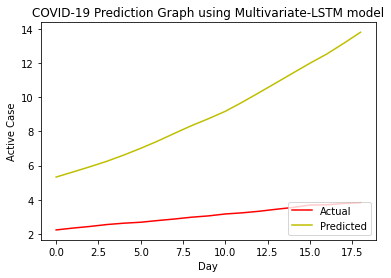

20/20 [==============================] - 0s 336us/step


[0.9651233553886414, 0.9651233553886414]

In [25]:
timesteps=5 #Very sensitive parameter, make it similar with the vale similar to the Baysian optimizer
train,val,test,sc=get_train_test(series)
    #named blackbox becuase it represents the structure
train_data,val_data,test_data,sc=get_original_train_test(series)
X_train = []
Y_train = []
X_val = []
Y_val = []
  
    # Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(train[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
for i in range(timesteps,val.shape[0]):
    X_val.append(val[i-timesteps:i])
    Y_val.append(val[i][0])
X_val,Y_val = np.array(X_val),np.array(Y_val)
model = create_model(X_train, data.x[0],data.x[1],10,data.x[3],data.x[4])
#model = create_model(X_train, gp_result.x[0],gp_result.x[1],gp_result.x[2],gp_result.x[3],0)#gp_result.x[4])
#model = create_model(X_train,0.0012745876086871953, 4, 28, 'relu', 0.04448209028401938)
history=model.fit(X_train,Y_train, epochs=5000,validation_data = (X_val, Y_val), callbacks=callbacks_list)
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
model.evaluate(X_val,Y_val)

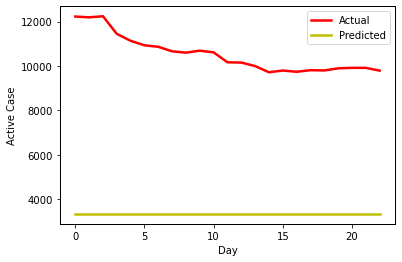

7233.829557351437


In [26]:
val_original=sc.inverse_transform(val2)
val_prediction=sc.inverse_transform(val3)
#plot_data(val_original[:,0],val_prediction[:,0])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(False)
ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('black')  

ax.patch.set_linewidth('1')  
plt.plot(act,c = 'r',linewidth=2.5)
plt.plot(prd,c = 'y',linewidth=2.5)
plt.xlabel('Day')
plt.ylabel('Active Case')
plt.legend(['Actual','Predicted'],loc = 'upper right')
plt.show()
mse = mean_squared_error(act,prd)
rmse = sqrt(mse)
print(rmse)

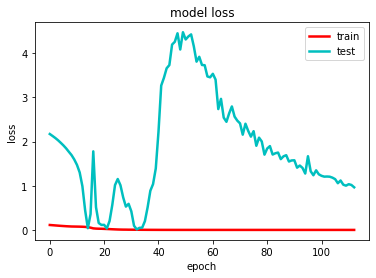

In [27]:
plt.plot(history.history['loss'],c='r',linewidth=2.5)
plt.plot(history.history['val_loss'],c='c',linewidth=2.5)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()